# Load Dataset

In [1]:
import os
from spacy.symbols import nn

In [2]:
#COCO_val2014_000000393225.jpg#0	Is this a creamy soup ? no
def load_data(data_path):
    data = []
    path = data_path

    with open(path, "r") as f:
        lines = f.readlines()

        for line in lines:
            tmp = line.split("\t")
            QA = tmp[1].rsplit("?",1)
            answer = QA[1].strip()

            data_sample = {
                'question': QA[0] + '?',
                'image_path': tmp[0][:-2], # Bỏ #0
                'answer': answer
            }

            data.append(data_sample)

    return data

In [3]:
# train_path = os.path.join("..", "data_coco", "vaq2.0.TrainImages.txt")
# val_path = os.path.join("..", "data_coco", "vaq2.0.DevImages.txt")
# test_path = os.path.join("..", "data_coco", "vaq2.0.TestImages.txt")

from google.colab import drive
drive.mount('/content/drive')

from datasets import load_dataset
my_cache_dir = "/content/drive/MyDrive/DATASET/data_coco"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
print("/content/drive/MyDrive/DATASET/data_coco")

/content/drive/MyDrive/DATASET/data_coco


In [4]:
# train_path = os.path.join("..", "data_coco", "vaq2.0.TrainImages.txt")
# val_path = os.path.join("..", "data_coco", "vaq2.0.DevImages.txt")
# test_path = os.path.join("..", "data_coco", "vaq2.0.TestImages.txt")

train_path = os.path.join( my_cache_dir, "vaq2.0.TrainImages.txt")
val_path = os.path.join(  my_cache_dir, "vaq2.0.DevImages.txt")
test_path = os.path.join( my_cache_dir, "vaq2.0.TestImages.txt")
train_data=load_data(train_path)
val_data=load_data(val_path)
test_data=load_data(test_path)


In [6]:
print(train_data[0])

{'question': 'Is this a creamy soup ?', 'image_path': 'COCO_val2014_000000393225.jpg', 'answer': 'no'}


# Data Process

In [12]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 953.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 123.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 114.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.21.0+cu124
    Uninstalling torchvision-0.21.0+cu124:
      Successfully uninstalled torchvision-0.21.0+cu124
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.6.0+cu124
    Uninstalling torchaudio-2.6.0+cu124:
      Successfully uninstalled torchaudio-2.6.0+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

In [9]:
!pip install torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 127.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
!pip install numpy==1.26.4

In [5]:
import spacy
from torchtext.vocab import build_vocab_from_iterator

In [6]:
nlp = spacy.load("en_core_web_sm")


def get_token(data_iters):
    for sample in data_iters:
        question = sample['question']
        yield [token.text for token in nlp.tokenizer(question)]


vocab = build_vocab_from_iterator(
    get_token(train_data),
    min_freq=2,
    specials=["<unk>", "sos", "eos", "<pad>"],
    special_first=True
)
vocab.set_default_index(vocab["<unk>"])#Nếu một token.text không có trong vocab, nó sẽ được gán ID của <unk>

In [7]:
#Độ dài cố định để xử lý theo batch
def tokenize(question_text, max_seq_len= 20):
    spacy_tokens = nlp.tokenizer(question_text)
    #  Chuyển các token thành ID số sử dụng vocab
    # Chúng ta cần lấy .text của mỗi  Token để tra cứu trong vocab
    numerical_sequence = [vocab[token.text] for token in spacy_tokens]
    current_len = len(numerical_sequence)
    if current_len < max_seq_len:
        padding_needed = max_seq_len - current_len
        numerical_sequence += [vocab['<pad>']] * padding_needed
    elif current_len > max_seq_len:
        numerical_sequence = numerical_sequence[:max_seq_len]
    return numerical_sequence

In [8]:
example = "Hello World!"
print(tokenize(example))
print(len(vocab))

[0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
1678


In [35]:
classes = set([sample['answer'] for sample in train_data])
classes_to_idx = {
    cls_name: idx for idx, cls_name in enumerate(classes)
}
idx_to_classes = {
    idx: cls_name for idx, cls_name in enumerate(classes)
}
print(idx_to_classes)

{0: 'no', 1: 'yes'}


In [36]:
print(classes)

{'no', 'yes'}


# Pytorch Dataset

In [10]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

In [11]:
class VQADataset(Dataset):
    def __init__(
        self,
        data,
        classes_to_idx,
        max_seq_len=20,       # Độ dài tối đa của chuỗi câu hỏi (mặc định là 20)
        transform=None,
        root_dir="/content/drive/MyDrive/DATASET/data_coco/val2014-resised/"
    ):
        self.transform = transform
        self.data = data
        self.max_seq_len = max_seq_len
        self.root_dir = root_dir
        self.classes_to_idx = classes_to_idx
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.data[idx]['image_path'])
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        question = self.data[idx]['question']
        question = tokenize(question, self.max_seq_len)
        question = torch.tensor(question, dtype = torch.long)

        label = self.data[idx]['answer']
        label = self.classes_to_idx[label]
        label = torch.tensor(label, dtype = torch.long)
        return img , question, label


# DataLoader

In [39]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [40]:
train_dataset = VQADataset(train_data, classes_to_idx, transform=transform)
val_dataset = VQADataset(val_data, classes_to_idx, transform=transform)
test_dataset = VQADataset(test_data, classes_to_idx, transform=transform)

In [41]:
train_batch_size = 64
test_batch_size = 32

train_loader = DataLoader(train_dataset, batch_size= train_batch_size, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size= test_batch_size, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size= test_batch_size, shuffle = False)

# Model

In [13]:
import torch
import torch.nn as nn
import timm


In [14]:
class VQAModel(nn.Module):
    def __init__(
            self,
            n_classes,
            embedding_dim = 64,
            n_layer = 2,
            hidden_size = 256,
            dropout = 0.2,
    ):
            super(VQAModel, self).__init__()
            self.image_encoder = timm.create_model(
                'resnet50',
                pretrained = True,
                num_classes = hidden_size,
            )
            self.image_fc = nn.Linear(hidden_size, 1024)

            self.embedding = nn.Embedding(len(vocab), embedding_dim)
            self.text_encoder = nn.LSTM(
                embedding_dim,
                hidden_size,
                num_layers = n_layer,
                bidirectional = True,
                batch_first = True,
            )
            self.text_fc = nn.Linear(hidden_size*2, 1024 )

            self.fc1 = nn.Linear(1024, 1000)
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(dropout)
            self.fc2 = nn.Linear(1000, n_classes)
    def forward(self, image, text):
        img_features = self.image_encoder(image)
        img_features = self.image_fc(img_features)

        text_emb = self.embedding(text)
        text_features,_ = self.text_encoder(text_emb)

        #Take the last hidden state from the sequence
        text_features = text_features[:, -1, :]  #[batch_size, hidden_size*2]
        text_features = self.text_fc(text_features)

        x = img_features * text_features
        x= self.fc1(x)
        x= self.relu(x)
        x= self.dropout(x)
        x= self.fc2(x)

        return x


In [15]:
n_classes = len(classes)
img_model_name = "resnet50"
hidden_size = 256
n_layer = 2
embedding_dim = 64
dropout = 0.2
device = "cuda" if torch.cuda.is_available() else "cpu"

model=VQAModel(
    n_classes=n_classes,
    embedding_dim=embedding_dim,
    n_layer=n_layer,
    hidden_size=hidden_size,
    dropout=dropout
).to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [24]:
!pip install numpy

In [16]:
import numpy as np

# Training

In [27]:
from tqdm.auto import tqdm

In [28]:
def fit(
            model,
            train_loader,
            val_loader,
            criterion,
            optimizer,
            scheduler,
            device,
            epochs,
            save_dir='../weights'
        ):
            train_losses = []
            val_losses = []
            train_accs = []
            val_accs = []
            best_val_acc = 0

            # Create directory for saving weights if it doesn't exist
            os.makedirs(save_dir, exist_ok=True)

            for epoch in range(epochs):
                batch_train_losses = []
                train_correct = 0
                train_total = 0

                model.train()
                pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")

                for images, questions, labels in pbar:
                    images = images.to(device)
                    questions = questions.to(device)
                    labels = labels.to(device)

                    optimizer.zero_grad()
                    outputs = model(images, questions)
                    loss = criterion(outputs, labels)
                    _, predicted = torch.max(outputs.data, 1)
                    train_total += labels.size(0)
                    train_correct += (predicted == labels).sum().item()
                    loss.backward()
                    optimizer.step()

                    batch_train_losses.append(loss.item())
                    pbar.set_postfix({'batch_loss': f'{loss.item():.4f}'})

                train_loss = sum(batch_train_losses) / len(batch_train_losses)
                train_losses.append(train_loss)
                train_acc = train_correct / train_total
                train_accs.append(train_acc)

                val_loss, val_acc = evaluate(
                    model, val_loader,
                    criterion,
                    device
                )
                val_losses.append(val_loss)
                val_accs.append(val_acc)

                # Save checkpoint if validation accuracy improves
                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    torch.save({
                        'epoch': epoch + 1,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'val_acc': val_acc,
                        'val_loss': val_loss,
                    }, f'{save_dir}/best_model.pth')
                    print(f"Saved best model with val_acc: {val_acc:.4f}")

                # Save periodic checkpoint
                if (epoch + 1) % 10 == 0:  # Save every 10 epochs
                    torch.save({
                        'epoch': epoch + 1,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                    }, f'{save_dir}/checkpoint_epoch{epoch+1}.pth')

                print(f"Epoch {epoch+1}/{epochs} - train_loss: {train_loss:.4f}, train_acc: {train_acc:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}")
                scheduler.step()

            # Save final model
            torch.save(model.state_dict(), f'{save_dir}/final_model.pth')

            return train_losses, val_losses, train_accs, val_accs

In [44]:
lr = 1e-2
epochs = 20

scheduler_step_size = epochs * 0.6
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=lr
)
scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=scheduler_step_size,
    gamma=0.1
)

**TRAINING**

In [32]:
train_losses, val_losses,train_accs , val_accs = fit(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    scheduler,
    device,
    epochs
)

Epoch 1/20:   0%|          | 0/123 [00:00<?, ?it/s]

Saved best model with val_acc: 0.5359
Epoch 1/20 - train_loss: 0.7220, train_acc: 0.5041, val_loss: 0.6916, val_acc: 0.5359


Epoch 2/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 2/20 - train_loss: 0.6927, train_acc: 0.5173, val_loss: 0.6907, val_acc: 0.5359


Epoch 3/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 3/20 - train_loss: 0.6929, train_acc: 0.5110, val_loss: 0.6912, val_acc: 0.5359


Epoch 4/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 4/20 - train_loss: 0.6933, train_acc: 0.5056, val_loss: 0.6908, val_acc: 0.5359


Epoch 5/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 5/20 - train_loss: 0.6930, train_acc: 0.5173, val_loss: 0.6925, val_acc: 0.5359


Epoch 6/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 6/20 - train_loss: 0.6928, train_acc: 0.5173, val_loss: 0.6914, val_acc: 0.5359


Epoch 7/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 7/20 - train_loss: 0.6927, train_acc: 0.5173, val_loss: 0.6911, val_acc: 0.5359


Epoch 8/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 8/20 - train_loss: 0.6927, train_acc: 0.5173, val_loss: 0.6925, val_acc: 0.5359


Epoch 9/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 9/20 - train_loss: 0.6928, train_acc: 0.5133, val_loss: 0.6936, val_acc: 0.4641


Epoch 10/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 10/20 - train_loss: 0.6928, train_acc: 0.5168, val_loss: 0.6912, val_acc: 0.5359


Epoch 11/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 11/20 - train_loss: 0.6929, train_acc: 0.5173, val_loss: 0.6919, val_acc: 0.5359


Epoch 12/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 12/20 - train_loss: 0.6928, train_acc: 0.5173, val_loss: 0.6924, val_acc: 0.5359


Epoch 13/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 13/20 - train_loss: 0.6928, train_acc: 0.5173, val_loss: 0.6917, val_acc: 0.5359


Epoch 14/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 14/20 - train_loss: 0.6927, train_acc: 0.5173, val_loss: 0.6914, val_acc: 0.5359


Epoch 15/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 15/20 - train_loss: 0.6926, train_acc: 0.5173, val_loss: 0.6913, val_acc: 0.5359


Epoch 16/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 16/20 - train_loss: 0.6926, train_acc: 0.5173, val_loss: 0.6913, val_acc: 0.5359


Epoch 17/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 17/20 - train_loss: 0.6926, train_acc: 0.5173, val_loss: 0.6913, val_acc: 0.5359


Epoch 18/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 18/20 - train_loss: 0.6926, train_acc: 0.5173, val_loss: 0.6913, val_acc: 0.5359


Epoch 19/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 19/20 - train_loss: 0.6926, train_acc: 0.5173, val_loss: 0.6914, val_acc: 0.5359


Epoch 20/20:   0%|          | 0/123 [00:00<?, ?it/s]

Epoch 20/20 - train_loss: 0.6926, train_acc: 0.5173, val_loss: 0.6913, val_acc: 0.5359


In [42]:
PATH_TO_WEIGHTS = '/content/drive/MyDrive/AI/VQA_CNN+LSTM/best_model.pth'
if os.path.exists(PATH_TO_WEIGHTS):
    print(f"Đang cố gắng tải trọng số từ: {PATH_TO_WEIGHTS}")
    try:
        checkpoint = torch.load(PATH_TO_WEIGHTS, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        print(f"Đã tải trọng số thành công từ: {PATH_TO_WEIGHTS}")

    except Exception as e:
        print(f"Lỗi khi tải trọng số: {e}")
        print("Bắt đầu huấn luyện từ đầu (hoặc từ trọng số ngẫu nhiên của mô hình).")
else:
    print(f"Không tìm thấy file trọng số tại: {PATH_TO_WEIGHTS}")
    print("Bắt đầu huấn luyện từ đầu (hoặc từ trọng số ngẫu nhiên của mô hình).")

Đang cố gắng tải trọng số từ: /content/drive/MyDrive/AI/VQA_CNN+LSTM/best_model.pth
Đã tải trọng số thành công từ: /content/drive/MyDrive/AI/VQA_CNN+LSTM/best_model.pth


# EVALUATION

In [28]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    losses = []
    with torch.no_grad():
        for image, question, labels in dataloader:
            image = image.to(device)
            question = question.to(device)
            labels = labels.to(device)
            outputs = model(image, question)
            loss = criterion(outputs, labels)
            losses.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    loss = sum(losses) / len(losses)
    acc = correct / total
    return loss, acc

In [46]:
val_loss, val_acc = evaluate(
    model,
    val_loader,
    criterion,
    device
)
test_loss, test_acc = evaluate(
    model,
    test_loader,
    criterion,
    device
)

print('Evaltation on val/test dataset')
print('Val accuracy: ', val_acc)
print('Test accuracy: ', test_acc)

Evaltation on val/test dataset
Val accuracy:  0.5358606557377049
Test accuracy:  0.5489614243323442


# TESTING

In [33]:
def predict(model, img_path, question, vocab, transform, idx_to_classes, device, max_seq_len=20):
    # Load and preprocess image
    try:
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).to(device)
    except FileNotFoundError:
        print(f"Không tìm thấy tệp ảnh tại: {img_path}")
        return None

    # Tokenize question using  defined tokenize function
    question_tokenized = [vocab[token.text] for token in nlp.tokenizer(question)]
    current_len = len(question_tokenized)
    if current_len < max_seq_len:
        padding_needed = max_seq_len - current_len
        question_tokenized += [vocab['<pad>']] * padding_needed
    elif current_len > max_seq_len:
        question_tokenized = question_tokenized[:max_seq_len]

    question_tensor = torch.tensor(question_tokenized, dtype=torch.long).unsqueeze(0).to(device)

    # Perform prediction
    model.eval()
    with torch.no_grad():
        outputs = model(image, question_tensor)
        predicted_idx = torch.argmax(outputs, dim=1).item()

    # Convert the predicted index to the answer string using idx_to_classes
    predicted_answer = idx_to_classes[predicted_idx]

    return predicted_answer

Nhập đường dẫn đến tệp ảnh (hoặc nhập '0' để dừng): /content/drive/MyDrive/DATASET/data_coco/sample/sample3.jpg
Nhập câu hỏi về ảnh: Are there any cars parked on the street ?


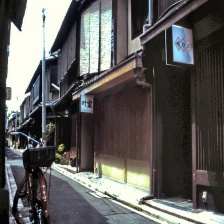


Câu hỏi: Are there any cars parked on the street ?
Câu trả lời dự đoán: no
--------------------
Nhập đường dẫn đến tệp ảnh (hoặc nhập '0' để dừng): /content/drive/MyDrive/DATASET/data_coco/sample/sample1.jpg
Nhập câu hỏi về ảnh: Is this man riding a bicycle ?


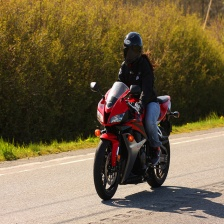


Câu hỏi: Is this man riding a bicycle ?
Câu trả lời dự đoán: no
--------------------
Nhập đường dẫn đến tệp ảnh (hoặc nhập '0' để dừng): 0
Dừng chương trình.


In [48]:
from IPython.display import display, Image as DisplayImage

while True:
    # Nhập đường dẫn ảnh và câu hỏi từ người dùng
    sample_image_path = input("Nhập đường dẫn đến tệp ảnh (hoặc nhập '0' để dừng): ")

    # Kiểm tra điều kiện dừng
    if sample_image_path == '0':
        print("Dừng chương trình.")
        break # Thoát khỏi vòng lặp

    sample_question = input("Nhập câu hỏi về ảnh: ")

    predicted_answer = predict(
        model,
        sample_image_path,
        sample_question,
        vocab,           # Truyền vocab
        transform,       # Truyền transform của torchvision
        idx_to_classes,  # Truyền idx_to_classes
        device           # Truyền device
    )
    if predicted_answer is not None: # predict trả về None nếu không tìm thấy ảnh
        # Hiển thị ảnh (tùy chọn, có thể thêm lại vào hàm predict)
        try:
            original_img = Image.open(sample_image_path).convert("RGB")
            display(original_img)
        except FileNotFoundError:
             pass

        print(f"\nCâu hỏi: {sample_question}")
        print(f"Câu trả lời dự đoán: {predicted_answer}")
        print("-" * 20)